In [24]:
import numpy as np
import cv2
#Import necessary functions
from matplotlib import pyplot as plt
import skimage.io
import skimage.color
from planarH import computeH_ransac, computeH_ransac_adaptive, compositeH, computeH_norm, compositeH_panorama, compositeH_panorama_blend

In [25]:
img_left = cv2.imread('../data/pano_left.jpg')
img_right = cv2.imread('../data/pano_right.jpg')
template_diagonal = int((img_right.shape[1]**2 + img_right.shape[0]**2)**(1/2))
img_left_padded = cv2.copyMakeBorder(img_left, top = template_diagonal*2, bottom= template_diagonal*2, left = template_diagonal*2, right = template_diagonal*2, borderType = 0)

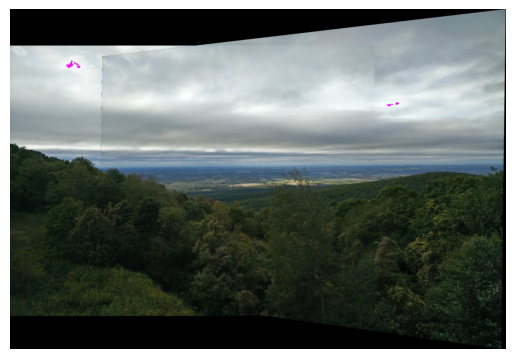

In [26]:
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20)

kp1, des1 = orb.detectAndCompute(img_right, None)
kp2, des2 = orb.detectAndCompute(img_left_padded, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

panorama = compositeH_panorama_blend(H2to1, img_left, img_right)
panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.imshow(panorama)
plt.axis('off')
plt.show()

In [27]:
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_right, None)
kp2, des2 = orb.detectAndCompute(img_left_padded, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

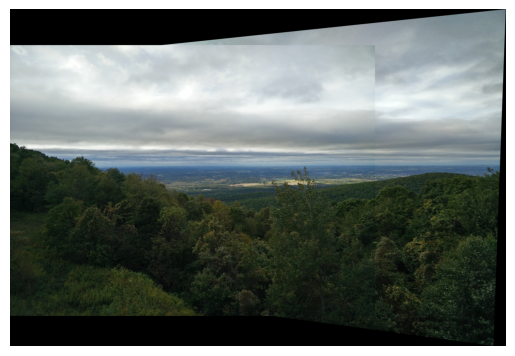

In [28]:
panorama = compositeH_panorama(H2to1, img_left, img_right)
panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.imshow(panorama)
plt.axis('off')
plt.show()

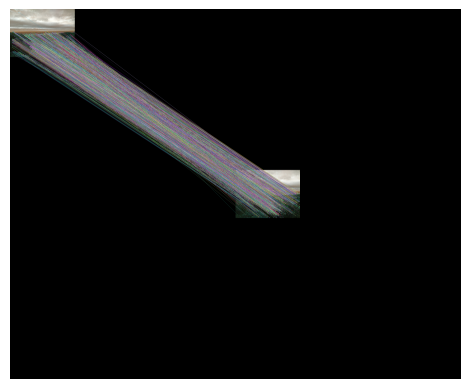

In [32]:
img_matches = cv2.drawMatches(img_right, kp1, img_left_padded, kp2,  best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image with matches
plt.imshow(img_matches)
plt.axis('off')
plt.show()

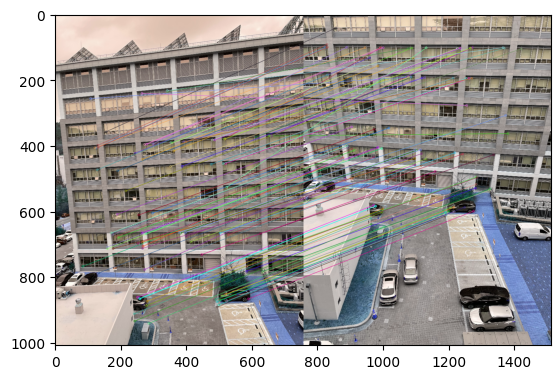

In [19]:
img_left = cv2.imread('../data/image2.png')
img_right = cv2.imread('../data/image4.png')

orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_left, None)
kp2, des2 = orb.detectAndCompute(img_right, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.01)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

img_matches = cv2.drawMatches(img_left, kp1, img_right, kp2,  best_matches, None, flags = 2)
beta[0:50] = delta[0:50]
# Display the image with matches
plt.imshow(img_matches)
plt.show()

In [20]:
img_left = cv2.imread('../data/image1.png')
img_right = cv2.imread('../data/image2.png')
template_diagonal = int((img_right.shape[1]**2 + img_right.shape[0]**2)**(1/2))
img_left_padded = cv2.copyMakeBorder(img_left, top = template_diagonal*2, bottom= template_diagonal*2, left = template_diagonal*2, right = template_diagonal*2, borderType = 0)

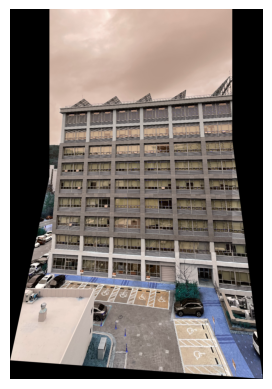

In [21]:
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_right, None)
kp2, des2 = orb.detectAndCompute(img_left_padded, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.1)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

panorama = compositeH_panorama(H2to1, img_left, img_right)
#panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

plt.imshow(panorama)
plt.axis('off')
plt.show()

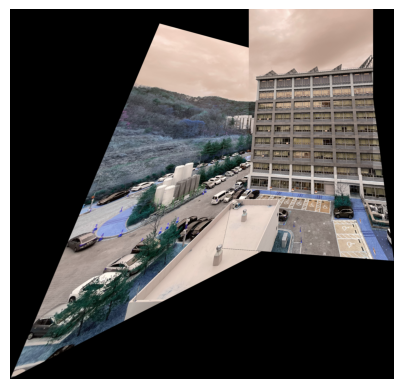

In [22]:
img_2 = cv2.imread('../data/image3.png')
template_diagonal = int((img_2.shape[1]**2 + img_2.shape[0]**2)**(1/2))
panorama_padded = cv2.copyMakeBorder(panorama, top = template_diagonal*2, bottom= template_diagonal*2, left = template_diagonal*2, right = template_diagonal*2, borderType = 0)


orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_2, None)
kp2, des2 = orb.detectAndCompute(panorama_padded, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

panorama = compositeH_panorama(H2to1, panorama, img_2)
#panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.imshow(panorama)
plt.axis('off')
plt.show()

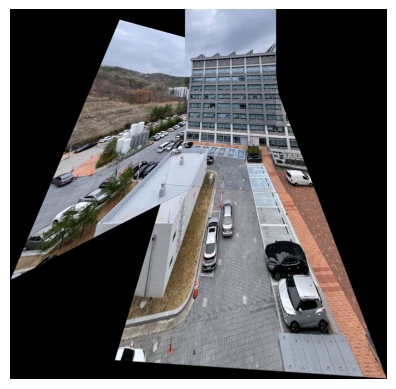

In [23]:
img_2 = cv2.imread('../data/image4.png')
template_diagonal = int((img_2.shape[1]**2 + img_2.shape[0]**2)**(1/2))
panorama_padded = cv2.copyMakeBorder(panorama, top = template_diagonal*2, bottom= template_diagonal*2, left = template_diagonal*2, right = template_diagonal*2, borderType = 0)


orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_2, None)
kp2, des2 = orb.detectAndCompute(panorama_padded, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

panorama = compositeH_panorama(H2to1, panorama, img_2)
panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.imshow(panorama)
plt.axis('off')
plt.show()

In [9]:
panorama = cv2.cvtColor(panorama, cv2.COLOR_RGB2BGR)

cv2.imwrite('../result//panorama.png',panorama)

True